# Lista 5

## Pandas i Dask

(8pkt + 2pkt)

Na liście znajduje się 8 zadań. Po rozwiązaniu zadania pokaż kod prowadzącemu i odpowiedz na **pytanie kontrolne** — tylko wtedy przyznajemy punkty. Dodatkowo prześlij zadanie na platformie skos.

Zadanie dodatkowe oznaczone jest ⭐️. Za wykonanie zadania otrzymasz 2pkt.

### Pandas

Rozważ bazę danych z wykładu i rozwiąż poniższe zadania.

In [1]:
import numpy as np
import pandas as pd

N = 100000

np.random.seed(123)
data_ = np.random.randint(1000, size=(N, 4))

df = pd.DataFrame(data_, columns=['time', 'uid', 'pid', 'rating'])
df['time'] = np.random.randint(24 * 60 * 60, size=(N))
df['time'] = pd.to_datetime('2025-01-01') + pd.to_timedelta(1e9 * df['time'])
df['rating'] = np.random.randint(10, size=(N))

df.head()

,time,uid,pid,rating
0,2025-01-01 19:32:35,365,382,8
1,2025-01-01 02:23:55,98,742,0
2,2025-01-01 12:11:17,106,123,7
3,2025-01-01 07:07:29,737,96,8
4,2025-01-01 20:31:12,47,73,2


#### Zadanie 1

Dla każdego użytkownika znajdź produkt (`pid`), który ocenił najczęściej.

In [2]:
df_ = df.groupby(['uid', 'pid']).size().unstack().fillna(0)
df_ = df_.idxmax(axis=1)
df_

,0
uid,
0,32
1,428
2,67
3,426
4,65
...,...
995,114
996,94
997,536


#### Zadanie 2

Policz liczbę ocen w każdej godzinie dnia.

**Wskazówka**

Użyj `resample()`.

In [3]:
df.set_index('time').resample('1h').size()

,0
time,
2025-01-01 00:00:00,4172
2025-01-01 01:00:00,4046
2025-01-01 02:00:00,4183
2025-01-01 03:00:00,4021
2025-01-01 04:00:00,4053
2025-01-01 05:00:00,4132
2025-01-01 06:00:00,4231
2025-01-01 07:00:00,4115
2025-01-01 08:00:00,4221


#### Zadanie 3

Wybierz oceny użytkowników w godzinach pracy: od 8:00 do 16:00. Następnie dla każdego produktu (`pid`) policz: liczbę ocen, średnią i maksymalną ocenę.

In [4]:
df_ = df.set_index('time').between_time('8:00', '16:00')

df_ = df_.groupby('pid')
df_ = df_.agg({'rating': ['count', 'mean', 'max']})
df_

rating              
     count      mean max
pid                     
0       38  5.105263   9
1       25  5.480000   9
2       39  5.256410   9
3       30  4.366667   9
4       30  5.000000   9
..     ...       ...  ..
995     33  4.939394   9
996     33  3.545455   9
997     32  4.687500   9
998     32  4.750000   9
999     35  4.571429   9

[1000 rows x 3 columns]

#### Zadanie 4

Przekształć kolumnę `rating` na słowa:

* 0–3 → "niska"
* 4–6 → "średnia"
* 7–9 → "wysoka"

**Wskazówka**

Użyj `map()`.

In [5]:
def rating_label(x):
    if x <= 3:
        return 'niska'
    elif x <= 6:
        return 'średnia'
    else:
        return 'wysoka'

df_ = df.copy()
df_['rating'] = df_['rating'].map(rating_label)
df_

,time,uid,pid,rating
0,2025-01-01 19:32:35,365,382,wysoka
1,2025-01-01 02:23:55,98,742,niska
2,2025-01-01 12:11:17,106,123,wysoka
3,2025-01-01 07:07:29,737,96,wysoka
4,2025-01-01 20:31:12,47,73,niska
...,...,...,...,...
99995,2025-01-01 09:33:24,360,407,średnia
99996,2025-01-01 01:58:02,966,924,niska
99997,2025-01-01 13:56:17,35,619,niska
99998,2025-01-01 02:29:07,976,176,średnia


#### Zadanie 5

Połącz tabelę *products* zawierającą nazwy produktów (`pid` → `product_name`) z głównym df.

In [6]:
products = pd.DataFrame({
    'pid': df['pid'].unique(),
    'product_name': ['Produkt_' + str(i) for i in range(len(df['pid'].unique()))]
})

df_u = df.join(products['product_name'], how='left', on='pid')
df_u

,time,uid,pid,rating,product_name
0,2025-01-01 19:32:35,365,382,8,Produkt_382
1,2025-01-01 02:23:55,98,742,0,Produkt_742
2,2025-01-01 12:11:17,106,123,7,Produkt_123
3,2025-01-01 07:07:29,737,96,8,Produkt_96
4,2025-01-01 20:31:12,47,73,2,Produkt_73
...,...,...,...,...,...
99995,2025-01-01 09:33:24,360,407,4,Produkt_407
99996,2025-01-01 01:58:02,966,924,3,Produkt_924
99997,2025-01-01 13:56:17,35,619,0,Produkt_619
99998,2025-01-01 02:29:07,976,176,5,Produkt_176


#### Zadanie 6

Policz, które produkty były najczęściej oceniane w poszczególnych godzinach. Zwizualizuj to na wykresie.

<Axes: xlabel='time'>

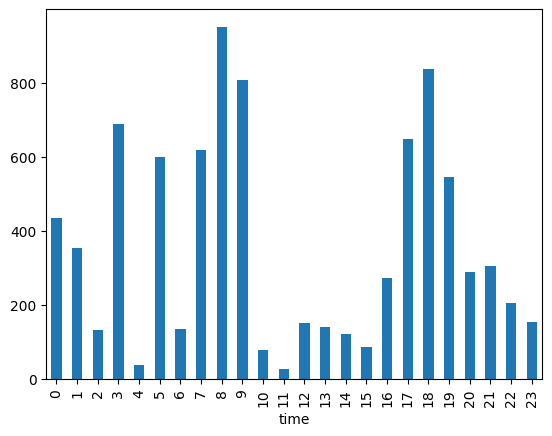

In [9]:
df_ = df.copy()
df_ = df_.groupby([df_['time'].dt.hour, 'pid']).size().fillna(0)
df_ = df_.unstack()
df_ = df_.idxmax(axis=1)
df_.plot(kind='bar')

#### Zadanie 7

Utwórz dla każdego użytkownika sekwencję identyfikatorów produktów (`pid`), które ocenił, ale tylko produkty ocenione więcej niż 50 razy w godzinach od 8:00 do 16:00.

**Wskazówka**

Godzinę możesz wyodrębnić za pomocą:

```python
df['time'].dt.hour
```

In [46]:
df_p = df.copy()
df_p = df_p.set_index('time').between_time('8:00', '16:00')
df_p = df_p.groupby('pid').size()
df_p = df_p[df_p > 50]

df_u = df.copy()
df_u = df_u[df_u['pid'].isin(df_p)]
df_u = df_u.set_index('time').sort_index().groupby('uid')['pid'].agg(list)
df_u


,pid
uid,
1,[52]
2,"[54, 52]"
5,[51]
9,[51]
10,[53]
...,...
990,[52]
992,[54]
994,"[51, 53]"


#### Zadanie 8

Podziel produkty na 3 grupy według „stabilności ocen” (liczba ocen produktu) i policz średnią ocenę dla każdego użytkownika w kolejnych godzinach dnia, ale tylko dla produktów należących do 3. grupy (produkty z największą liczbą ocen).

**Wskazówka**

Może się przydać funkcja `qcut()`, `merge()`.

In [82]:
df_rating = df.copy()
df_rating = pd.cut(df_rating['rating'], bins=3, labels=False).to_frame()
df_ = df[df_rating['rating'] == 2]
df_.set_index('time').groupby('uid').resample('1h')['rating'].mean().unstack().fillna(0.)

time,2025-01-01 00:00:00,2025-01-01 01:00:00,2025-01-01 02:00:00,2025-01-01 03:00:00,2025-01-01 04:00:00,2025-01-01 05:00:00,2025-01-01 06:00:00,2025-01-01 07:00:00,2025-01-01 08:00:00,2025-01-01 09:00:00,...,2025-01-01 14:00:00,2025-01-01 15:00:00,2025-01-01 16:00:00,2025-01-01 17:00:00,2025-01-01 18:00:00,2025-01-01 19:00:00,2025-01-01 20:00:00,2025-01-01 21:00:00,2025-01-01 22:00:00,2025-01-01 23:00:00
uid,,,,,,,,,,,,,,,,,,,,,
0,8.000000,7.500000,0.000000,0.000000,8.0,7.0,0.000000,8.0,8.000000,9.0,...,0.0,8.0,0.000000,8.0,0.0,8.333333,7.000000,7.0,8.00,9.000000
1,0.000000,9.000000,9.000000,8.000000,8.0,8.0,0.000000,0.0,8.000000,9.0,...,8.0,0.0,8.000000,9.0,0.0,7.000000,0.000000,0.0,7.00,7.000000
2,0.000000,7.333333,8.333333,8.000000,8.0,0.0,8.333333,8.0,7.750000,7.0,...,9.0,9.0,0.000000,8.0,9.0,9.000000,8.000000,8.0,0.00,7.500000
3,8.000000,9.000000,7.000000,7.000000,8.0,0.0,0.000000,8.0,0.000000,7.5,...,9.0,7.0,8.166667,7.5,7.0,7.000000,0.000000,7.5,7.00,0.000000
4,8.500000,8.500000,8.000000,9.000000,7.0,7.0,8.500000,7.5,0.000000,8.0,...,7.5,9.0,8.500000,0.0,9.0,7.000000,7.666667,8.5,9.00,8.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.666667,9.000000,8.000000,9.000000,9.0,0.0,7.000000,7.5,7.000000,0.0,...,7.0,8.0,8.000000,0.0,0.0,8.500000,7.000000,0.0,0.00,0.000000
996,9.000000,0.000000,8.000000,8.333333,0.0,9.0,0.000000,7.0,8.333333,7.0,...,9.0,7.0,9.000000,9.0,7.0,0.000000,0.000000,0.0,7.25,8.000000
997,9.000000,7.333333,9.000000,0.000000,9.0,7.5,8.750000,8.0,9.000000,9.0,...,7.8,8.0,0.000000,7.5,8.0,9.000000,0.000000,8.0,0.00,0.000000


### ⭐️ Dask

Wygenerujemy dane syntetyczne w Pandas i zapiszemy je do CSV.

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 1_000_000

df = pd.DataFrame({
    "uid": np.random.randint(1, 100_000, size=n),
    "movie_id": np.random.randint(1, 5000, size=n),
    "rating": np.random.uniform(1, 5, size=n).round(2),
    "timestamp": pd.date_range("2020-01-01", periods=n, freq="min")
})

df.to_csv("ratings.csv", index=False)
print("Zapisano plik: ratings.csv")

Zapisano plik: ratings.csv


In [2]:
from dask.distributed import Client
client = Client()  # start distributed scheduler locally.
client

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:45645
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:40319'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:43643'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:35165 name: 1
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:35165
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:40160
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:45591 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:45591
INFO:distributed.core:Starting established connection to tcp://127

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 2
Total threads: 2,Total memory: 12.67 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45645,Workers: 0
Dashboard: http://127.0.0.1:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:45591,Total threads: 1
Dashboard: http://127.0.0.1:36989/status,Memory: 6.34 GiB
Nanny: tcp://127.0.0.1:40319,


#### Zadanie 1

Wczytaj dane z pliku *ratings.csv* do Dask DataFrame. Ile partycji ma wczytany plik? Sprawdź rozmiar danych (`memory_usage()`)

In [3]:
import dask.dataframe as dd

ddf = dd.read_csv('ratings.csv')
print(ddf.npartitions)
ddf.memory_usage().compute()

1


,0
Index,132
uid,8000000
movie_id,8000000
rating,8000000
timestamp,27000000


#### Zadanie 2

Oblicz średnią ocenę oraz policz liczbę ocen > 4.

In [4]:
print(ddf['rating'].mean().compute())

print((ddf['rating'] > 4).sum().compute())

2.9993551000000003
248540


#### Zadanie 3

Pokaż, jak Dask rozkłada obliczenia na taski dla operacji:

```python
ddf.groupby("uid")["rating"].mean()
```

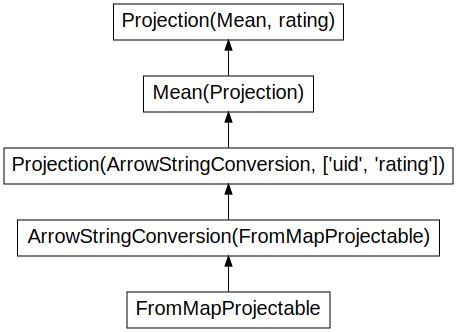

In [5]:
ddf.groupby("uid")["rating"].mean().visualize()

#### Zadanie 4

Znajdź 10 filmów z najwyższą średnią oceną (tylko jeśli mają >100 ocen). Niech wynik będzie zapisany w pamięci.

In [39]:
ddf_size = (ddf.groupby('movie_id').size() > 100)
ddf_avg = ddf.groupby('movie_id')['rating'].mean()

ddf_ = ddf_avg[ddf_size]

ddf_ = ddf_.nlargest(10).compute()
ddf_

,rating
movie_id,
621,3.353220
4224,3.331755
3736,3.293943
1048,3.293280
1500,3.284029
1417,3.274503
1626,3.273962
1735,3.272353
1227,3.271968
